### Using Plotly Library for Interactive Data Visualization in Python

Importing Required Libraries

In [19]:
import pandas as pd
import numpy as np
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()

In [2]:
init_notebook_mode(connected=True)

### The Dataset
The dataset that we are going to use for this section is the "Tips" dataset that is downloaded by default with the Seaborn library. The dataset contains information about the amount spent by a group of people at lunch and dinner. The dataset contains gender, price, tips, age, size, day, time and whether the people who had lunch or dinner were smokers or not

In [3]:
import seaborn as sns
dataset = sns.load_dataset('tips')
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Before using Plotly to draw interactive plots, let's remind ourselves how we used Pandas for plotting static graphs. Let's call the plot() method on our dataframe to see how Pandas plot static plots. We will plot the values for the 'total_bill', 'tip', and 'sex' columns.

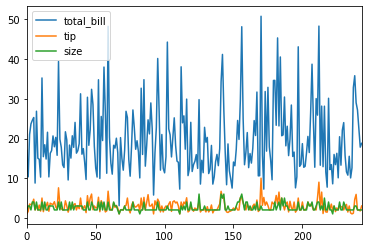

In [4]:
dataset2 = dataset[["total_bill", "tip", "size"]]
dataset2.plot()

From the output, you can see the static line plot for the 'total_bill' and 'tips' column.

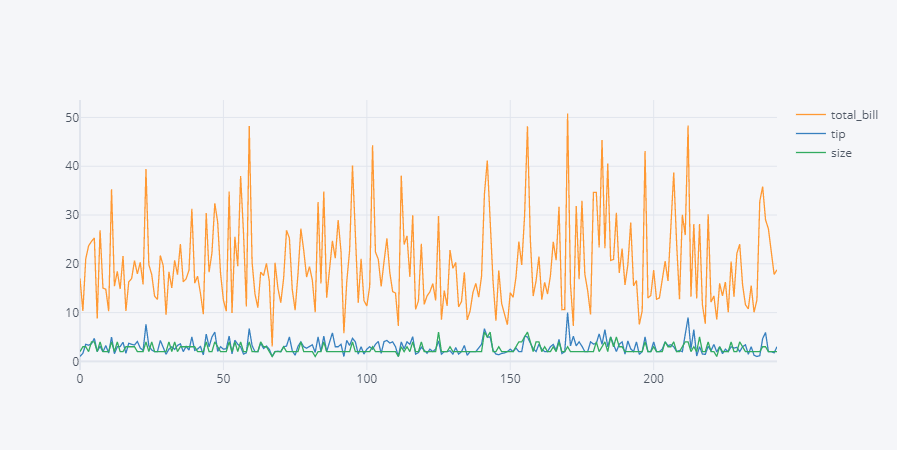

In [66]:
dataset2.iplot()

If you hover over the plot you should see values changing. You can zoom in and zoom out of the plot using the options available at the top right corner of the plot. You can also add and remove columns from the plot. Finally, you can also save the graph as a static image.

### The Bar Plot

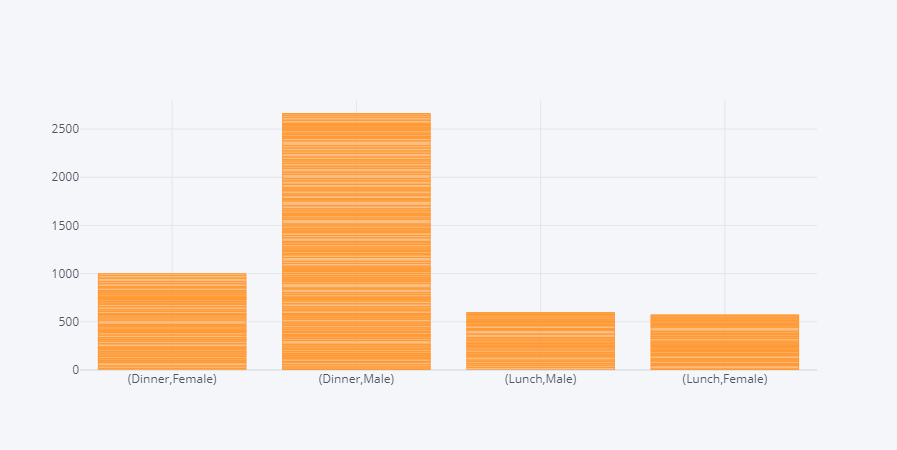

In [6]:
dataset.iplot(kind='bar', x=['time', 'sex'],y='total_bill')

You can see from the output that four bars have been plotted for the total bill. The bars show all possible combinations of values in the sex and time columns.

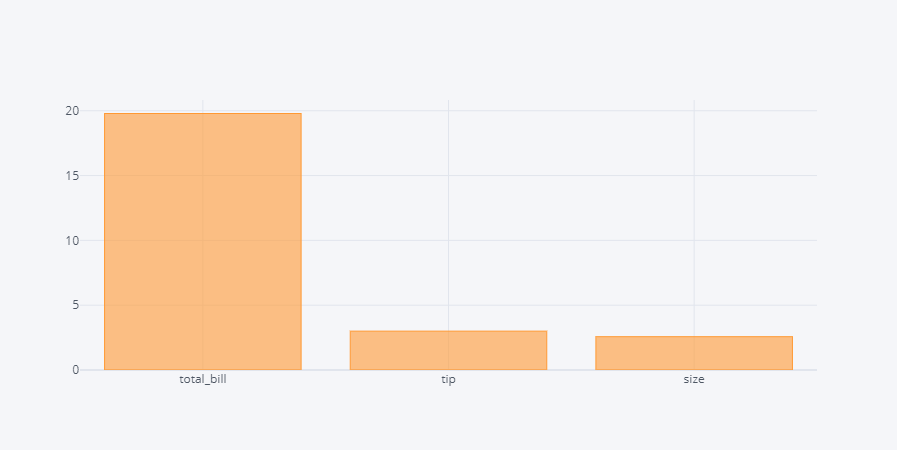

In [7]:
dataset.mean().iplot(kind='bar')

In the output, you can see the bar plots with mean values for total_bill, tip and size column

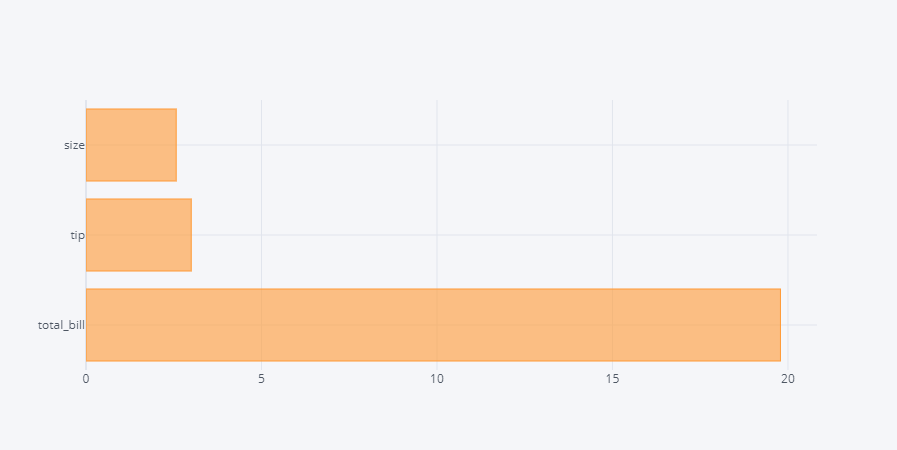

In [8]:
dataset.mean().iplot(kind='barh')


In the output, you can see the horizontal bar plots for the mean values of total_bill, tip and size columns.

### The Scatter Plot

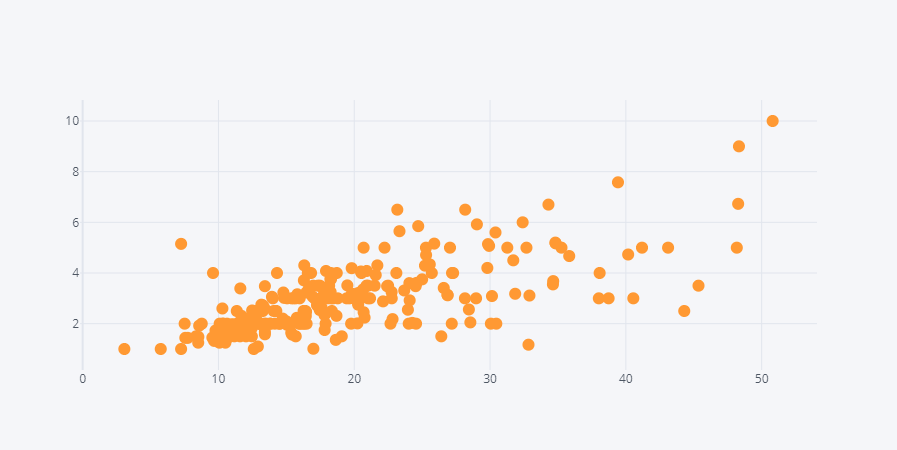

In [9]:
dataset.iplot(kind='scatter', x='total_bill', y='tip', mode='markers')

Hover your mouse over the interactive plot to see the changing values for total_bill and tip columns.

### The Box Plot

In the output, you will see box plots for all the numerical columns in the data i.e. total_bill, tip and size.

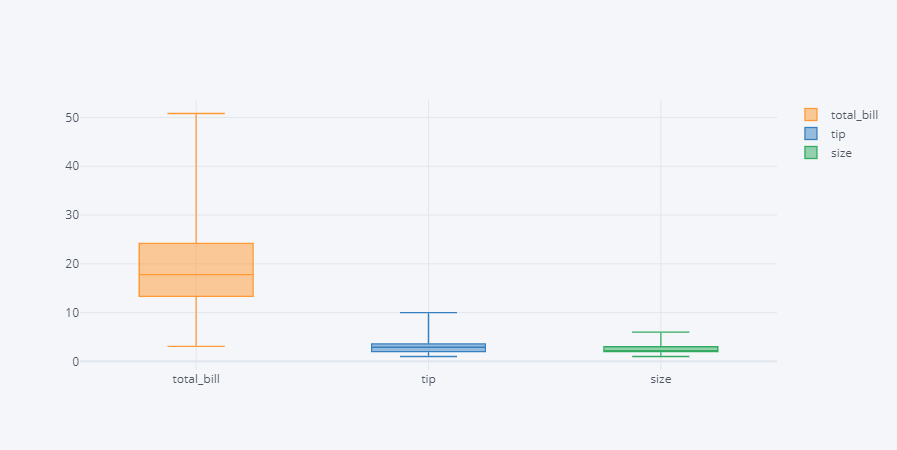

In [10]:
dataset2.iplot(kind='box')

### The Hist Plot

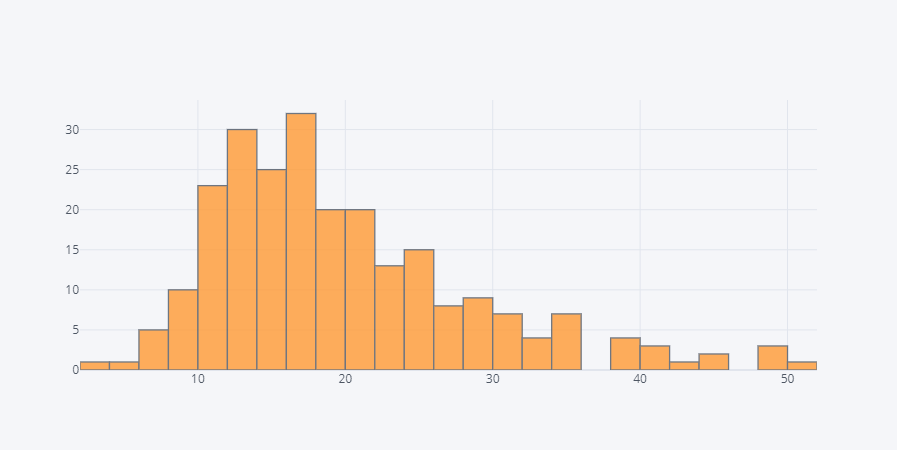

In [11]:
dataset['total_bill'].iplot(kind='hist',bins=25)

### The Scatter Matrix Plot

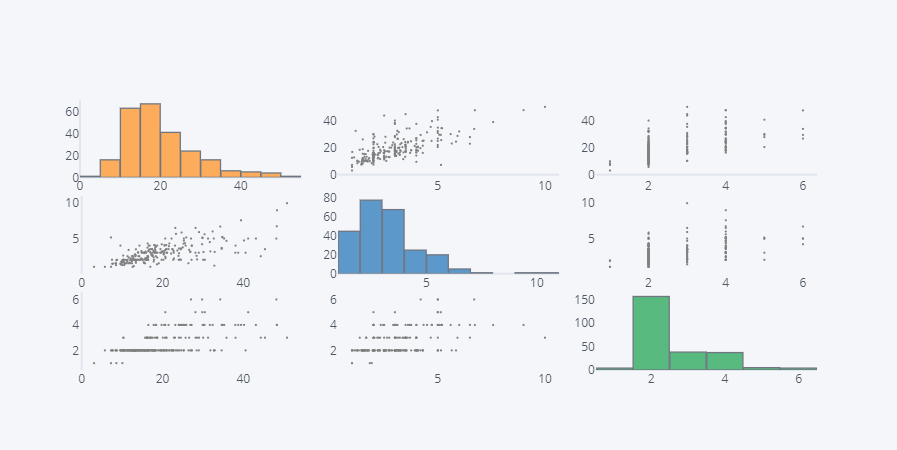

In [12]:
dataset2.scatter_matrix()

### The Spread Plot

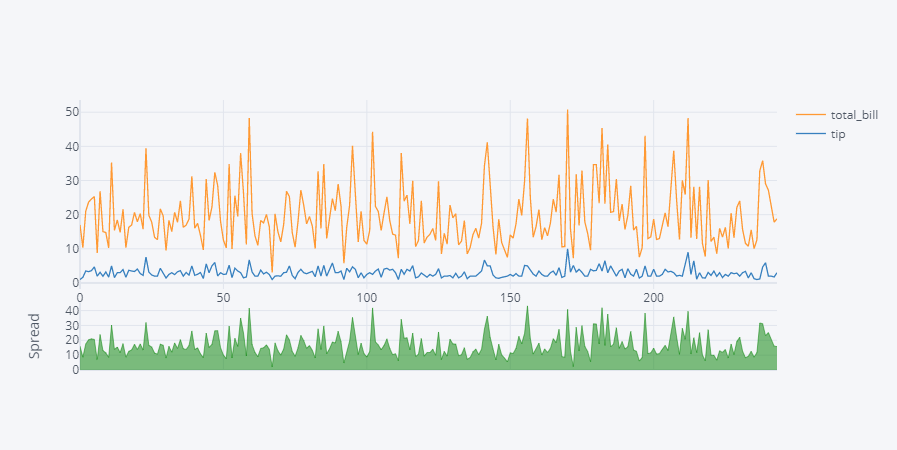

In [13]:
dataset[['total_bill','tip']].iplot(kind='spread')

From the output, you can see that as the total_bill increases, the spread between the total_bill and tip also increases.

### 3D Plots

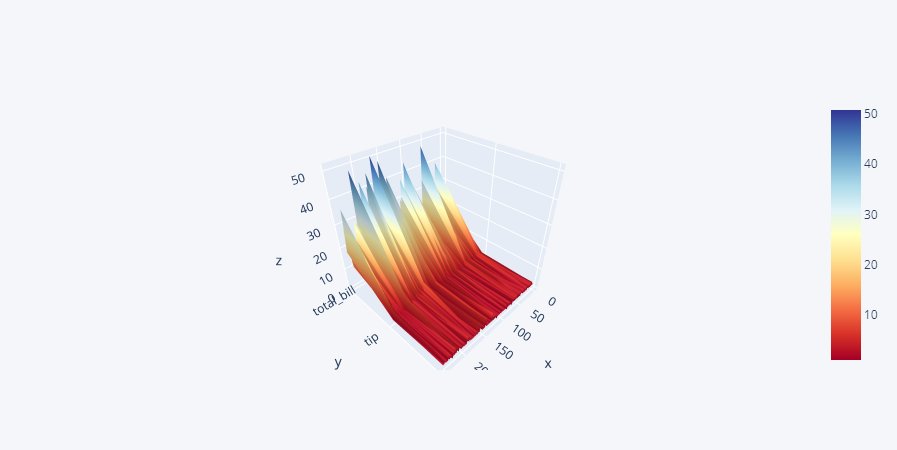

In [14]:
dataset2 = dataset[["total_bill", "tip", "size"]]
data = dataset2.iplot(kind='surface', colorscale='rdylbu')

In the output you can see 3D plot, you can move, turn it around, and zoom in and zoom out of the plot.

### Plotly for Geographical Plots

In [20]:

import plotly.graph_objs as go


In [21]:
map_data = dict(type='choropleth',
            locations=['MI', 'CO', 'FL', 'IN'],
            locationmode='USA-states',
            colorscale='Portland',
            text=['Michigan', 'Colorado', 'Florida', 'Indiana'],
            z=[1.0,2.0,3.0,4.0],
            colorbar=dict(title="USA States")
           )

In [22]:
map_layout = dict(geo = {'scope':'usa'})

In [23]:
map_actual = go.Figure(data=[map_data], layout=map_layout)

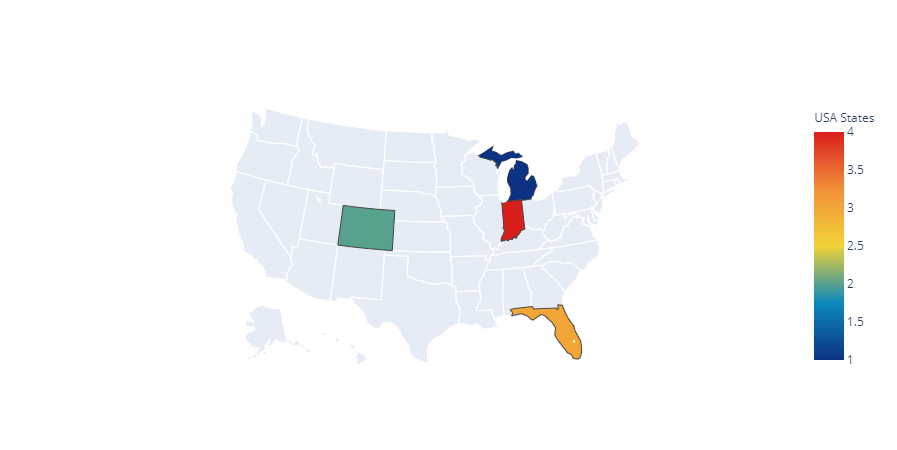

In [24]:
iplot(map_actual)

In the output, you will see the geographical plot for four US states. You can see that the rest of the state have not been colored since we did not specify any information regarding those states. If you hover the mouse over the colored states, you will see the corresponding values of the text and z keys that we specified when we created our data dictionary.

In [26]:
df = pd.read_csv('../machine/bea-gdp-by-state.csv')
df.head()

,Fips,Area,2013,2014,2015,2016,2017
0,0,United States,48534,49329,50301,50660,51337
1,1000,Alabama,36674,36473,36818,37158,37508
2,2000,Alaska,69711,67179,65971,63304,63610
3,4000,Arizona,38352,38534,38787,38940,39583
4,5000,Arkansas,35888,36265,36295,36502,36714


One way to do this is to create a dictionary for the state names and their abbreviations and then later create a column that contains abbreviated values from that dictionary. The following script creates a dictionary where the keys are the full state names and the values are the corresponding state abbreviations

In [27]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [28]:
df['abbrev'] = df['Area'].map(us_state_abbrev)

In [29]:
df.head()

,Fips,Area,2013,2014,2015,2016,2017,abbrev
0,0,United States,48534,49329,50301,50660,51337,NaN
1,1000,Alabama,36674,36473,36818,37158,37508,AL
2,2000,Alaska,69711,67179,65971,63304,63610,AK
3,4000,Arizona,38352,38534,38787,38940,39583,AZ
4,5000,Arkansas,35888,36265,36295,36502,36714,AR


In [30]:
map_data = dict(type='choropleth',
            locations=df['abbrev'],
            locationmode='USA-states',
            colorscale='Reds',
            text=df['Area'],
            marker=dict(line=dict(color='rgb(255,0,0)', width=2)),
            z=df['2017'],
            colorbar=dict(title="GDP Per Capita - 2017")
           )

In [31]:
map_layout = dict(title='USA States GDP Per Capita - 2017',
              geo=dict(scope='usa',
                         showlakes=True,
                         lakecolor='rgb(85,173,240)')
             )

In [32]:
map_actual = go.Figure(data=[map_data], layout=map_layout)

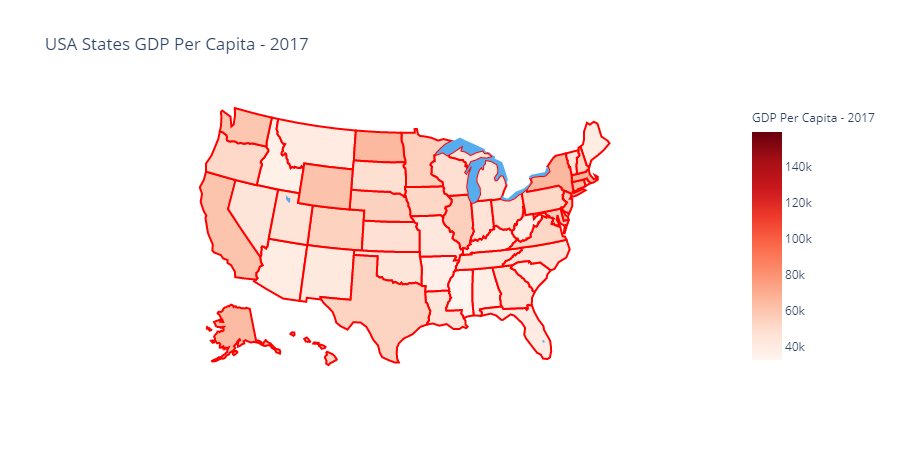

In [33]:
iplot(map_actual)

In [34]:
df = pd.read_csv('../machine/world_pop.csv')
df.head()

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281


In [35]:
map_data = dict(
        type='choropleth',
        locations=df['Country Code'],
        z=df['2016'],
        text=df['Country'],
        colorbar={'title': 'World Population 2016'},
      )

In [36]:
map_layout = dict(
    title='World Population 2016',
    geo=dict(showframe=False)
)

In [37]:
map_actual = go.Figure(data=[map_data], layout=map_layout)

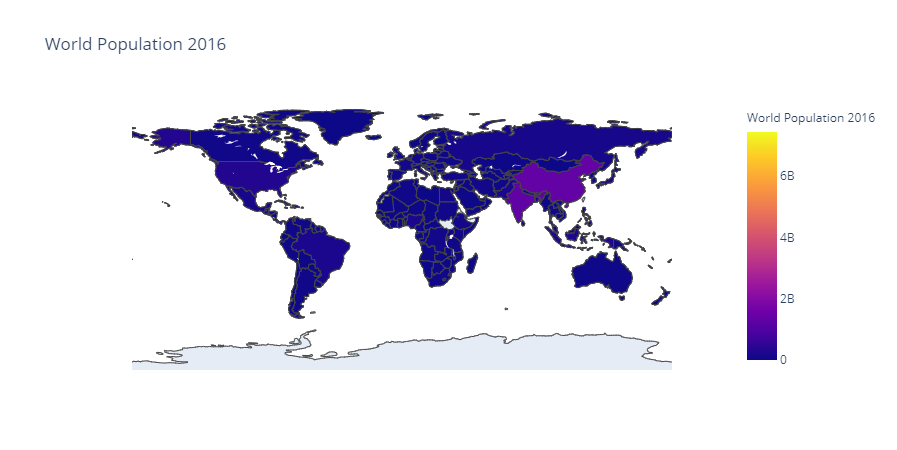

In [38]:
iplot(map_actual)

In the output, you can see the map of the whole world along with the population densities. You can see that the map for India and China is darker compared to the other countries since they are much more populated compared to European countries that are less populated. If you hover the mouse over any country, you should see the name of the country along with the total population.